In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from PIL import Image
from torch.utils.data.sampler import WeightedRandomSampler
from torchvision.datasets import DatasetFolder
import torchvision
from tqdm.notebook import tqdm as tqdm
from torchsampler import ImbalancedDatasetSampler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# train_path = "/home/chisc/workspace/wuzhenrong/galaxy/unsuper/images_gz2/"
train_path = "/home/chisc/workspace/wuzhenrong/galaxy/three_type/"

In [3]:
batch_size = 100
train_trans = transforms.Compose([transforms.Resize((255, 255)),transforms.ToTensor()])
train_data = ImageFolder(train_path, transform=train_trans)
train_loader = DataLoader(train_data, batch_size=batch_size, sampler=ImbalancedDatasetSampler(train_data))

tensor(1)


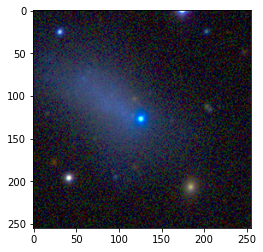

tensor(0)


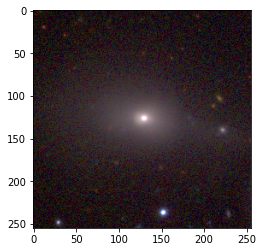

tensor(0)


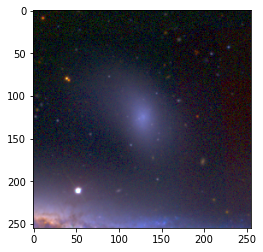

In [4]:
images, labels = next(iter(train_loader))
for i in np.arange(3):
    print(labels[i])
    plt.figure(i)
    plt.imshow(images[i].permute(1, 2, 0))
    plt.show()

In [5]:
pca = PCA(n_components=2)

In [6]:
color = ['red', 'blue', 'black']
def show2d(x, y):
    for i in range(len(x)):
        plt.scatter(x[i][0], x[i][1], color=color[y[i]])
    plt.show()
    
def show3d(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(x)):
        plt.scatter(x[i][0], x[i][1], x[i][2], color=color[y[i]])
    plt.show()

## Method 1 torch.pca_lowrank

torch.Size([100, 3, 255, 255])
100


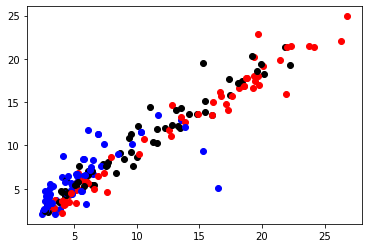

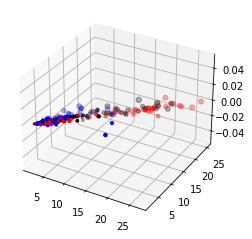

In [7]:
for x, y in train_loader:
    x = torch.squeeze(x)
    print(x.shape)
    print(len(x))
    i_2d = []
    i_3d = []
    for i in range(len(x)):
        i_2d.append(torch.pca_lowrank(x[i], q=2)[1].numpy())
    for i in range(len(x)):
        i_3d.append(torch.pca_lowrank(x[i], q=3)[1].numpy())
#     print(i_2d)
    show2d(i_2d, y)
    show3d(i_3d, y)
    break

## Method 2 sklearn PCA

torch.Size([100, 195075])
8.530793761141764


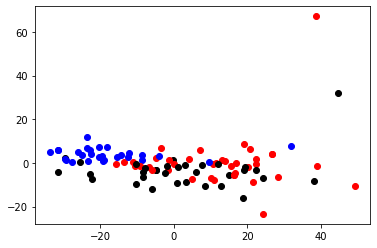

In [9]:
for x, y in train_loader:
    x = x.flatten(start_dim=1, end_dim=3)
    x = torch.squeeze(x)
    # pca
#     print(x.shape)
    pca2d = decomposition.PCA(2)
    pca3d = decomposition.PCA(3)
    d3 = []
    d2 = []
    print(x.shape)
    pca3d.fit(x)
    tmp = pca3d.fit_transform(x)
    d3.append(tmp)
    pca2d.fit(x)
    d2.append(pca2d.fit_transform(x))
    print(d2[0][0][0])
    show2d(d2[0], y)
#     show3d(d3[0], y)
    break
# pca = decomposition.PCA()
# pca.fit(x)